In [4]:
from climada.util.api_client import Client
from climada.util.constants import RIVER_FLOOD_REGIONS_CSV
#from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood,flood_imp_func_set
import pandas as pd
from climada.engine import Impact
from climada.hazard import Hazard
import numpy as np
from climada.util import yearsets
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import xarray as xr
from scipy import sparse
import copy

In [8]:
plt.rcParams.update({'font.size': 15})


country='MDG'
impact_mat_list = []
dates = []
for climate_model in ['gfdl-esm2m', 'hadgem2-es', 'ipsl-cm5a-lr', 'miroc5']:
    for vector_model in ['lcmi', 'lmm']:
        for years in ['1951_2005']:
            if vector_model =='lcmi':
                file = "".join(['/Users/szelie/OneDrive - ETH Zurich/data/ISIMIP_Results/', vector_model, '/', vector_model, '_', climate_model,'_historical_nosoc_co2_lts_global_annual_',years,'.nc4'])
            if vector_model=='lmm':
                file = "".join(['/Users/szelie/OneDrive - ETH Zurich/data/ISIMIP_Results/', vector_model, '/', vector_model, '_', climate_model,'_historical_na_co2_lts_global_annual_',years,'.nc4'])
            
            data = xr.open_dataset(file)
            data = data.sel(time=slice("1980-01-01", "2005-01-02"))
            data = data.astype('float')
            impact_mat = np.nan_to_num(np.array(data.lts))
            impact_mat = np.reshape(impact_mat, (impact_mat.shape[0], impact_mat.shape[1]*impact_mat.shape[2]))
            impact_mat_list.append(sparse.csr_matrix(np.array(impact_mat)))
            #(dates.append(d) for d in np.unique(data.time))

df = data.to_dataframe().reset_index()
df = df.groupby(['lat','lon']).sum().reset_index()
intensity = sparse.vstack(impact_mat_list)
hazard = Hazard.from_raster(file)
hazard.intensity = intensity
hazard.event_id = np.arange(intensity.shape[0])
hazard.event_name = np.arange(intensity.shape[0])
hazard.date = np.arange(intensity.shape[0])+1
hazard.frequency = np.ones(intensity.shape[0])/intensity.shape[0]
hazard.orig = np.zeros(intensity.shape[0])
hazard.fraction = copy.deepcopy(hazard.intensity)
hazard.fraction[hazard.fraction>0]=1
hazard.tag.haz_type = 'malaria'
#hazard.centroids.set_region_id()
#hazard_mdg = hazard.select(reg_id=450)

import numpy as np
from climada.entity import ImpactFunc
from climada.entity import ImpactFuncSet


imp_fun_set = ImpactFuncSet()

# We initialise a dummy ImpactFunc for tropical cyclone wind damage to building.
# Giving the ImpactFunc an arbitrary id 3.
import numpy as np
from climada.entity import ImpactFunc
from climada.entity import ImpactFuncSet


imp_fun_set = ImpactFuncSet()

# We initialise a dummy ImpactFunc for tropical cyclone wind damage to building.
# Giving the ImpactFunc an arbitrary id 3.
imp_fun = ImpactFunc()
imp_fun.haz_type = 'malaria'
imp_fun.id = 1
imp_fun.name = 'impf_malaria'
# provide unit of the hazard intensity
imp_fun.intensity_unit = 'Length of transmission season (months)'
# provide values for the hazard intensity, mdd, and paa
imp_fun.intensity = np.linspace(0, 12, num=120)
lin =  np.linspace(0, 11, num=110)*0.015
imp_fun.mdd = np.concatenate((np.zeros(10), lin))

imp_fun.paa = np.ones(120)
# check if the all the attributes are set correctly
imp_fun.check()
imp_fun_set.append(imp_fun)

from climada.util.api_client import Client
client =Client()
people = client.get_exposures('litpop', properties={'country_iso3alpha':country, 'exponents':'(0,1)'})

impact_mat_list = []
dates = []
for climate_model in ['gfdl-esm2m', 'hadgem2-es', 'ipsl-cm5a-lr', 'miroc5']:
    for vector_model in ['lcmi', 'lmm']:
        for years in ['2006_2099']:
            if vector_model =='lcmi':
                file = "".join(['/Users/szelie/OneDrive - ETH Zurich/data/ISIMIP_Results/', vector_model, '/', vector_model, '_', climate_model,'_rcp85_nosoc_co2_lts_global_annual_',years,'.nc4'])
            if vector_model=='lmm':
                file = "".join(['/Users/szelie/OneDrive - ETH Zurich/data/ISIMIP_Results/', vector_model, '/', vector_model, '_', climate_model,'_rcp85_na_co2_lts_global_annual_',years,'.nc4'])
            
        data = xr.open_dataset(file)
        data = data.sel(time=slice("2050-01-01", "2075-01-02"))

        data = data.astype('float')
        impact_mat = np.nan_to_num(np.array(data.lts))
        impact_mat = np.reshape(impact_mat, (impact_mat.shape[0], impact_mat.shape[1]*impact_mat.shape[2]))
        impact_mat_list.append(sparse.csr_matrix(np.array(impact_mat)))
        #(dates.append(d) for d in np.unique(data.time))
from climada.engine import Impact
impact_malaria = Impact()
impact_malaria.calc(people, imp_fun_set, hazard, save_mat=True)
        
df = data.to_dataframe().reset_index()
df = df.groupby(['lat','lon']).sum().reset_index()
intensity = sparse.vstack(impact_mat_list)
hazard_cc = Hazard.from_raster(file)
hazard_cc.intensity = intensity
hazard_cc.event_id = np.arange(intensity.shape[0])
hazard_cc.event_name = np.arange(intensity.shape[0])
hazard_cc.date = np.arange(intensity.shape[0])+1
hazard_cc.frequency = np.ones(intensity.shape[0])/intensity.shape[0]
hazard_cc.orig = np.zeros(intensity.shape[0])
hazard_cc.fraction = copy.deepcopy(hazard_cc.intensity)
hazard_cc.fraction[hazard_cc.fraction>0]=1
hazard_cc.tag.haz_type = 'malaria'
#hazard.centroids.set_region_id()
#hazard_mdg = hazard.select(reg_id=450)


from climada.engine import Impact
impact_future_malaria = Impact()
impact_future_malaria.calc(people, imp_fun_set, hazard_cc, save_mat=True)

impact_malaria = make_yearset(impact_malaria, people)[0]
impact_future_malaria = make_yearset(impact_future_malaria, people)[0]

ax = impact_malaria.calc_freq_curve().plot(color='lightblue')
impact_future_malaria.calc_freq_curve().plot(axis=ax, color='coral')

2022-04-05 19:16:08,607 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.


NameError: name 'make_yearset' is not defined

In [ ]:
impact_malaria.aai_agg

In [25]:
client = Client()
tc = client.get_hazard('tropical_cyclone', properties={'country_iso3alpha':country, 'climate_scenario':'historical', 'nb_synth_tracks':'10'})
tc_future = client.get_hazard('tropical_cyclone', properties={'country_iso3alpha':country, 'climate_scenario':'rcp85', 'nb_synth_tracks':'10', 'ref_year':'2060'})

In [26]:
client = Client()
rf = client.get_hazard('river_flood', properties={'country_iso3alpha':country, 'climate_scenario':'historical'})
rf_future = client.get_hazard('river_flood', properties={'country_iso3alpha':country, 'climate_scenario':'rcp85', 'year_range':'2050_2070'})

In [27]:
import numpy as np
from climada.entity import ImpactFunc
from climada.entity import ImpactFuncSet


imp_fun_set_tc = ImpactFuncSet()

# We initialise a dummy ImpactFunc for tropical cyclone wind damage to building.
# Giving the ImpactFunc an arbitrary id 3.
imp_fun = ImpactFunc()
imp_fun.haz_type = 'TC'
imp_fun.id = 1
imp_fun.name = 'impf_tc'
# provide unit of the hazard intensity
imp_fun.intensity_unit = 'Length of transmission season (months)'
# provide values for the hazard intensity, mdd, and paa
imp_fun.intensity = np.linspace(0, 100, num=100)
imp_fun.mdd = np.concatenate((np.zeros(33), np.ones(67)))
imp_fun.paa = np.ones(100)
# check if the all the attributes are set correctly
imp_fun.check()
imp_fun_set_tc.append(imp_fun)

2022-03-23 10:14:06,274 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.


In [28]:
import numpy as np
from climada.entity import ImpactFunc
from climada.entity import ImpactFuncSet


imp_fun_set_rf = ImpactFuncSet()

# We initialise a dummy ImpactFunc for tropical cyclone wind damage to building.
# Giving the ImpactFunc an arbitrary id 3.
imp_fun = ImpactFunc()
imp_fun.haz_type = 'RF'
imp_fun.id = 1
imp_fun.name = 'impf_rf'
# provide unit of the hazard intensity
imp_fun.intensity_unit = 'Length of transmission season (months)'
# provide values for the hazard intensity, mdd, and paa
imp_fun.intensity = np.linspace(0, 10, num=10)
imp_fun.mdd = np.concatenate((np.zeros(1), np.ones(9)))
imp_fun.paa = np.ones(10)
# check if the all the attributes are set correctly
imp_fun.check()
imp_fun_set_rf.append(imp_fun)

2022-03-23 10:14:06,279 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.


In [29]:
tc.check()

In [30]:
def make_yearset(impact, exposures, n_samples=1, years=np.array(range(1,400))):
    lam = np.sum(impact.frequency)
    lam = np.round(lam, 10)
    yearset_list = [sample_events(impact, lam=lam, years=years) for n in range(n_samples)]
    if yearset_list[0].imp_mat.shape[0]>len(years):
        yearset_list = [yearsets.aggregate_impact_to_year(yearset, exp=exposures) for yearset in yearset_list]
        
    return(yearset_list)

from climada.engine import Impact
impact_tc = Impact()
impact_tc_future = Impact()


impact_tc.calc(people, imp_fun_set_tc, tc, save_mat=True)
impact_tc_future.calc(people, imp_fun_set_tc, tc_future, save_mat=True)

impact_tc_future = make_yearset(impact_tc_future, people)[0]
impact_tc = make_yearset(impact_tc, people)[0]

impact_rf = Impact()
impact_rf_future = Impact()


impact_rf.calc(people, imp_fun_set_rf, rf, save_mat=True)
impact_rf_future.calc(people, imp_fun_set_rf, rf_future, save_mat=True)

impact_rf_future = make_yearset(impact_rf_future, people)[0]
impact_rf = make_yearset(impact_rf, people)[0]


/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [98]:
aai_agg_dict = {'tc': impact_tc.aai_agg, 'tc_2060': impact_tc_future.aai_agg, 'rf': impact_rf.aai_agg, 'rf_2060': impact_rf_future.aai_agg, 'mal': impact_malaria.aai_agg, 'mal_2060': impact_future_malaria.aai_agg, 'total':total_impact.aai_agg, 'total_2060':total_impact_future.aai_agg}

Text(0, 0.5, 'aai_agg [$]')

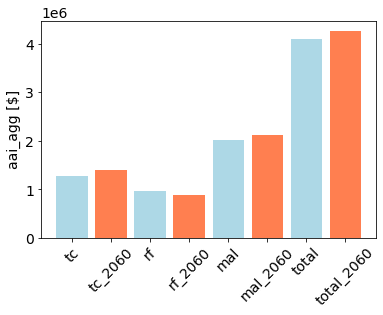

In [107]:
plt.rcParams.update({'font.size': 14})


fig, ax = plt.subplots()
ax.bar(aai_agg_dict.keys(), aai_agg_dict.values(), color=['lightblue','coral'])
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax.set_ylabel('aai_agg [$]')


In [33]:
aai_agg_dict = {'tc': impact_tc.aai_agg, 'tc_2060': impact_tc_future.aai_agg, 'rf': impact_rf.aai_agg, 'rf_2060': impact_rf_future.aai_agg, 'mal': impact_malaria.aai_agg, 'mal_2060': impact_future_malaria.aai_agg}

<AxesSubplot:title={'center':'Exceedance frequency curve'}, xlabel='Return period (year)', ylabel='Impact (people)'>

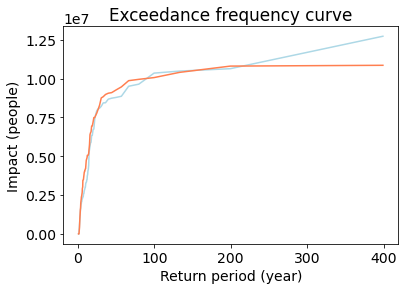

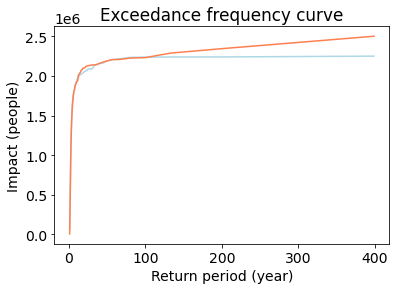

In [34]:
fig,ax =plt.subplots()
impact_tc.calc_freq_curve().plot(axis=ax, color='lightblue')
impact_tc_future.calc_freq_curve().plot(axis=ax, color='coral')

fig,ax =plt.subplots()
impact_rf.calc_freq_curve().plot(axis=ax, color='lightblue')
impact_rf_future.calc_freq_curve().plot(axis=ax, color='coral')



([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

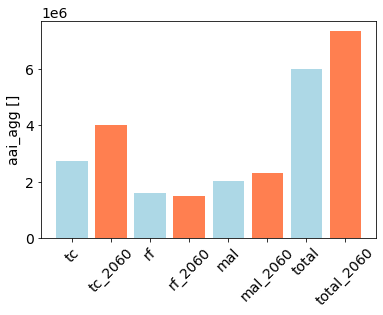

In [114]:
impact_yearsets_mdg = {'tc': impact_tc,  'rf': impact_rf,'mal': impact_malaria}
impact_yearsets_mdg_future = {'tc_2060': impact_tc_future, 'rf_2060': impact_rf_future, 'mal_2060': impact_future_malaria}
total_impact = combine_impacts(list(impact_yearsets_mdg.values()), exp=people)
total_impact_future = combine_impacts(list(impact_yearsets_mdg_future.values()), exp=people)

event=np.where((total_impact.at_event>np.quantile(total_impact.at_event,0.9)) * (total_impact.at_event<np.quantile(total_impact.at_event,0.91)))[0]
event_future=np.where((total_impact_future.at_event>np.quantile(total_impact_future.at_event,0.9)) * (total_impact_future.at_event<np.quantile(total_impact_future.at_event,0.91)))[0]

max_event = {'tc': np.median(impact_tc.at_event[event]), 'tc_2060': np.median(impact_tc_future.at_event[event_future]),  'rf': np.median(impact_rf.at_event[event]), 'rf_2060': np.median(impact_rf_future.at_event[event_future]), 'mal': np.median(impact_malaria.at_event[event]), 'mal_2060': np.median(impact_future_malaria.at_event[event_future]), 'total' : np.median(total_impact.at_event[event]), 'total_2060' : np.median(total_impact_future.at_event[event_future])}
fig, ax = plt.subplots()
ax.bar(max_event.keys(), max_event.values(), color=['lightblue','coral'])
ax.set_ylabel('aai_agg []')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees



In [94]:
total_impact_future.at_event[event_future]

array([7369788.79191736, 7275275.63255253, 7367515.47601821,
       7330758.69400338])

In [92]:
total_impact_future.aai_agg

4259120.311436484

<AxesSubplot:title={'center':'Exceedance frequency curve'}, xlabel='Return period (year)', ylabel='Impact (people)'>

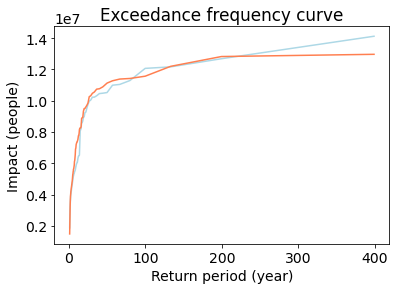

In [71]:
fig,ax =plt.subplots()
total_impact.calc_freq_curve().plot(axis=ax, color='lightblue')
total_impact_future.calc_freq_curve().plot(axis=ax, color='coral')



<GeoAxesSubplot:title={'center':'Expected annual impact'}>

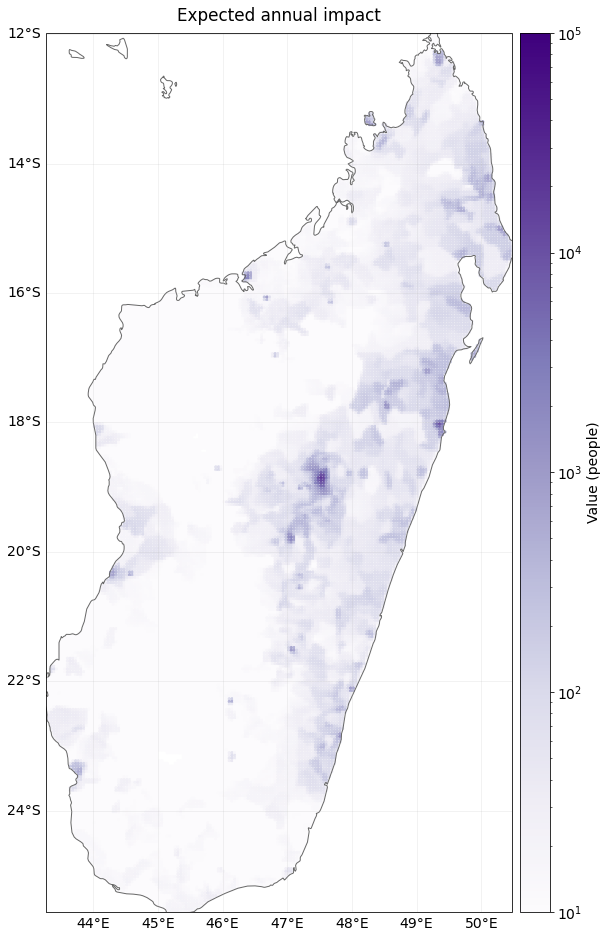

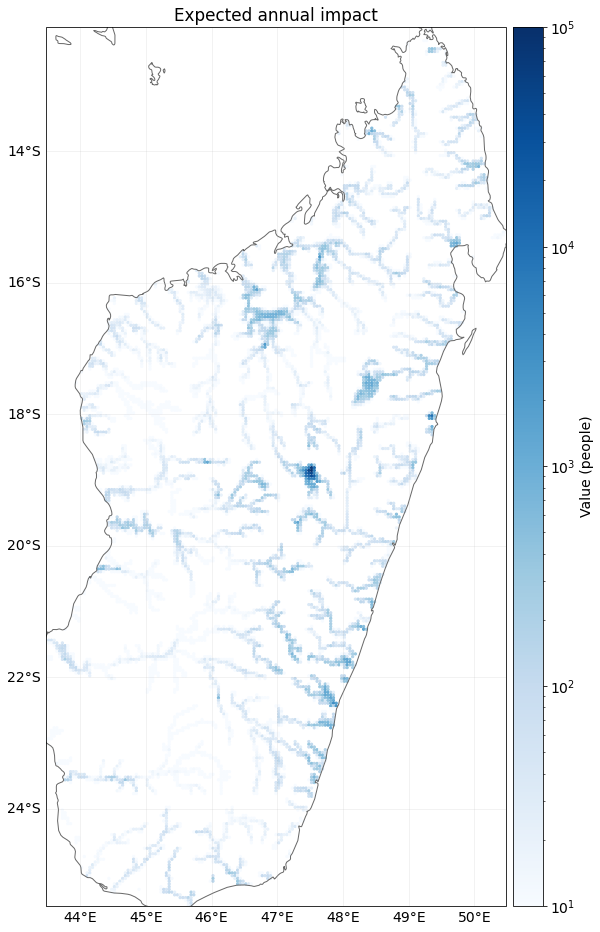

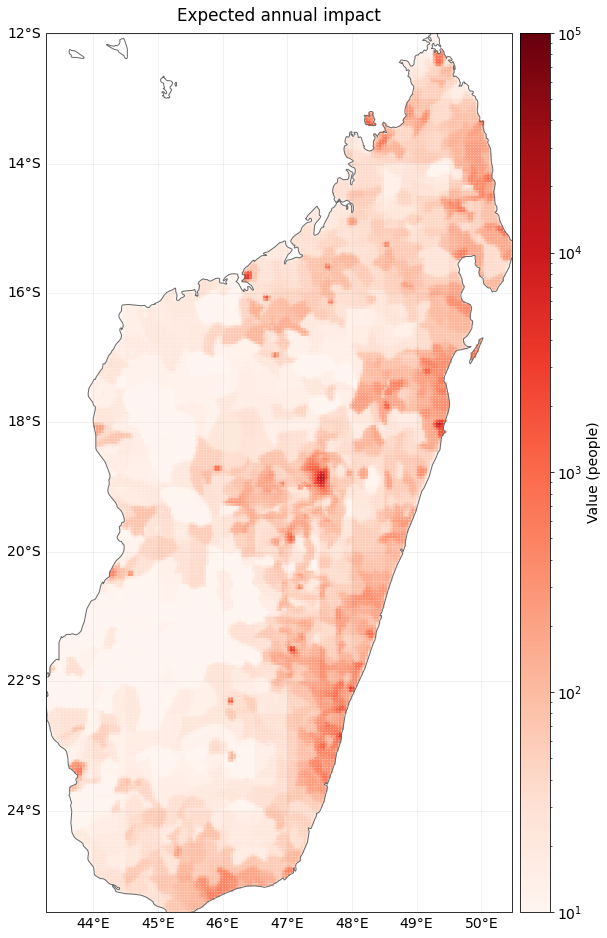

In [52]:
impact_tc.plot_scatter_eai_exposure(norm=matplotlib.colors.LogNorm(),vmin=10, vmax=100000, cmap='Purples', adapt_fontsize=False, pop_name=False, s=5)
impact_rf.plot_scatter_eai_exposure(norm=matplotlib.colors.LogNorm(),vmin=10, vmax=100000, cmap='Blues', adapt_fontsize=False, pop_name=False, s=5)
impact_malaria.plot_scatter_eai_exposure(norm=matplotlib.colors.LogNorm(), vmin=10, vmax=100000, cmap='Reds', adapt_fontsize=False, pop_name=False, s=5)

<GeoAxesSubplot:title={'center':"LitPop Exposure for ['MDG'] at 150 as, year: 2018, financial mode:\npop, exp: [0, 1], admin1_calc: False"}>

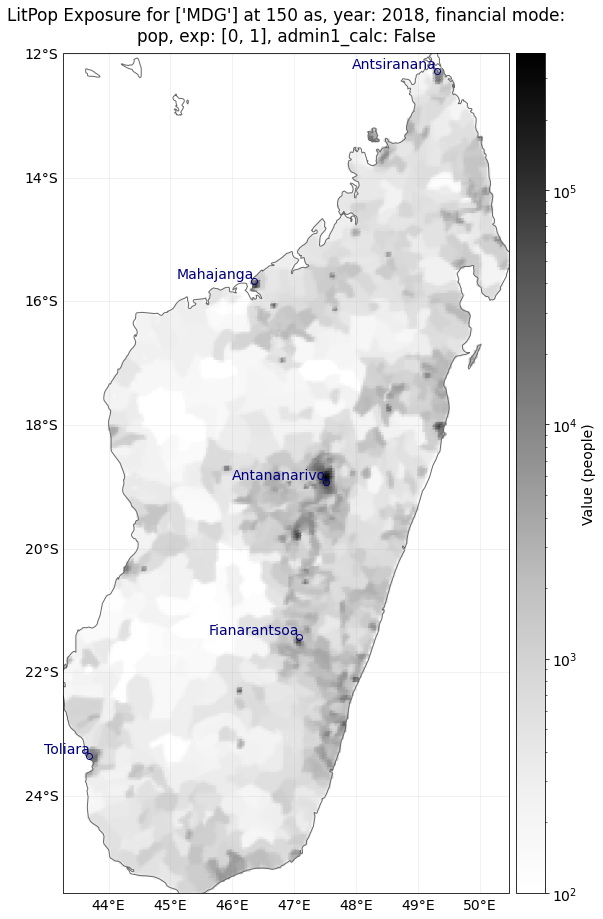

In [38]:
people.plot_scatter(norm=matplotlib.colors.LogNorm(), cmap='Greys', vmin=100, s=10, adapt_fontsize=False)

<GeoAxesSubplot:>

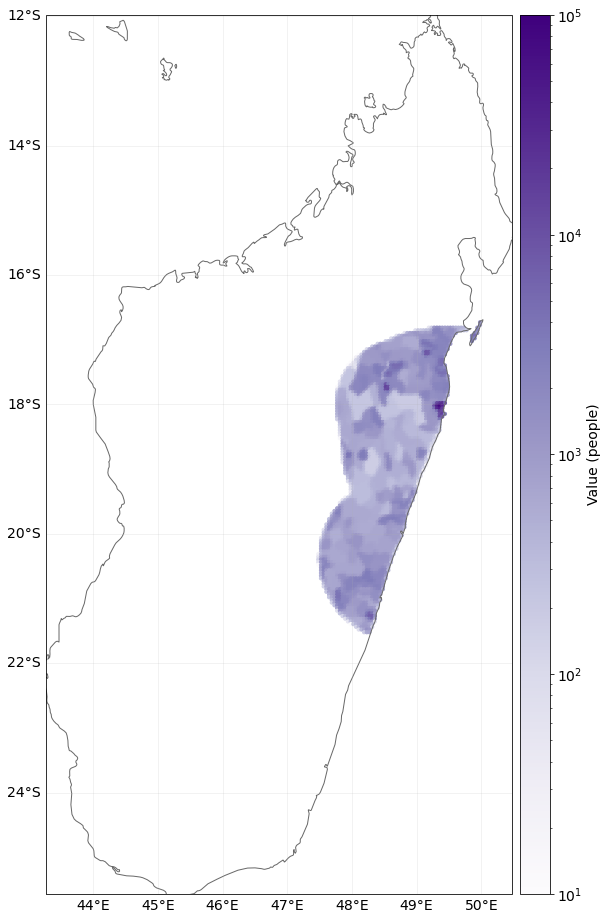

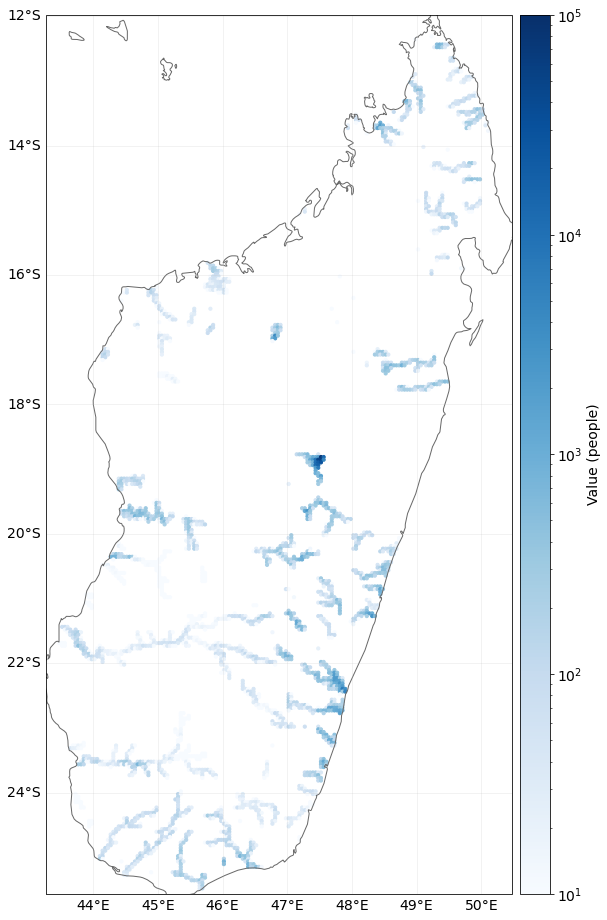

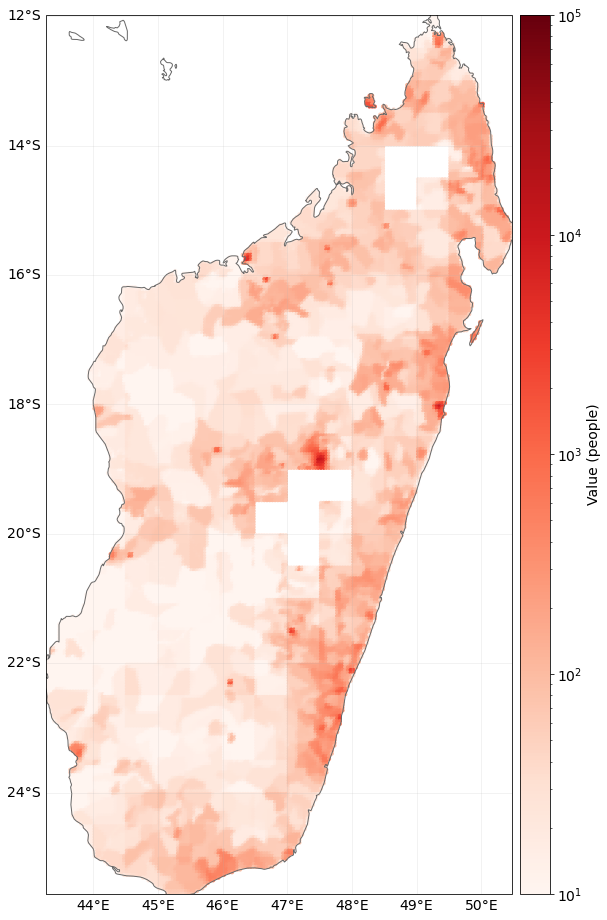

In [83]:
impact_tc.plot_scatter_impact_exposure(event_id=impact_tc.event_id[event][2], norm=matplotlib.colors.LogNorm(),vmin=10, vmax=100000, cmap='Purples', adapt_fontsize=False, pop_name=False, ignore_zero=False, s=10)
impact_rf.plot_scatter_impact_exposure(event_id=impact_tc.event_id[event][2], norm=matplotlib.colors.LogNorm(),vmin=10, vmax=100000, cmap='Blues', adapt_fontsize=False, pop_name=False, ignore_zero=False, s=10)
impact_malaria.plot_scatter_impact_exposure(event_id=impact_tc.event_id[event][2], norm=matplotlib.colors.LogNorm(), vmin=10, vmax=100000, cmap='Reds', adapt_fontsize=False, pop_name=False, ignore_zero=False, s=10)

In [84]:
impact_rf.at_event[event][2]

670188.1094297904

In [ ]:
total_impact.plot_basemap_impact_exposure?

In [ ]:
fig, ax = plt.subplots()
ax.bar(aai_agg_dict.keys(), imp_mat.values(), color=['lightblue','coral'])
ax.set_ylabel('aai_agg')

In [ ]:
impact_yearsets_mdg.values

In [ ]:
impact_tc_future.calc_freq_curve().impact[impact_tc_future.calc_freq_curve().return_per==99.75]

In [ ]:
for 

In [ ]:
impact_yearsets_mdg = {'tc': impact_tc, 'rf': impact_rf, 'mal': impact_malaria}

In [ ]:
{impact: impact_yearsets_mdg[impact].calc_freq_curve().impact[impact_yearsets_mdg[impact].calc_freq_curve().return_per>99][0] for impact in impact_yearsets_mdg}
    

In [ ]:
matrices_yearsets_aai_exp = {hazard: sp.sparse.csr_matrix(impact_yearsets_mdg[hazard].imp_mat.sum(axis=0)/400) for hazard in impact_yearsets_mdg}


In [ ]:
hazard_comparaisons_aai = compare_hazards(matrices_yearsets_aai_exp)

In [ ]:
hazard_comparaisons_aai

In [ ]:
color_list = ['white','plum','red']


cat_name = ['no damage']
[cat_name.append(cat[0]) for cat in list(hazard_comparaisons_aai.keys()) if cat!='all']
print(cat_name)
cmap =  ListedColormap(color_list[0:len(cat_name)])
geo_scatter_categorical(hazard_comparaisons_aai['all'], impact_yearsets_mdg['rf'].coord_exp, 'Hazard causing most damage', title=country,
                      cat_name=cat_name, cmap=cmap, alpha=0.5, s=20, adapt_fontsize=False)


